In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential
import keras 

# Import Dataset

In [2]:
data=datasets.fashion_mnist
(train_img,train_labels),(test_img,test_labels)=data.load_data()

In [3]:
type(train_img)

numpy.ndarray

In [4]:
print(len(train_img))
print(len(test_img))

60000
10000


In [5]:
print(train_img[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0
    0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0
    5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2
    0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134
  138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241
  177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   

# Display Image

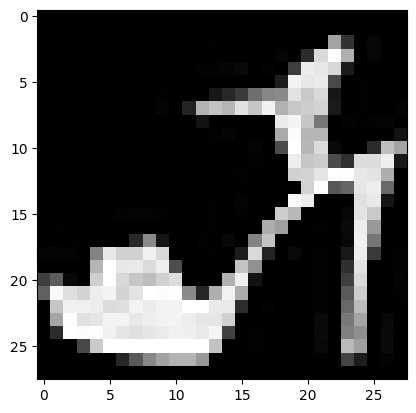

In [6]:
plt.imshow(train_img[9],cmap="grey")
plt.show()

# Scaling Images

In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

# Reshape Images

In [8]:
train_img=train_img.reshape((train_img.shape[0],28,28,1))
test_img=test_img.reshape((test_img.shape[0],28,28,1))

# CNN Model

In [9]:
model=Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
        
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(10))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and Fit Model

In [10]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [13]:
history = model.fit(train_img, train_labels, validation_data=(test_img, test_labels), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9287 - loss: 0.1924 - val_accuracy: 0.9077 - val_loss: 0.2679
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9373 - loss: 0.1721 - val_accuracy: 0.9044 - val_loss: 0.2749
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9404 - loss: 0.1604 - val_accuracy: 0.9077 - val_loss: 0.2753
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9486 - loss: 0.1392 - val_accuracy: 0.9068 - val_loss: 0.2763
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9523 - loss: 0.1268 - val_accuracy: 0.9068 - val_loss: 0.3009
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9557 - loss: 0.1186 - val_accuracy: 0.9024 - val_loss: 0.3241
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9615 - loss: 0.1051 - val_accuracy: 0.9074 - val_loss: 0.3228
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9627 -

In [14]:
test_loss,test_accuracy=model.evaluate(test_img,test_labels,verbose=2)
print("Test Loss :",test_loss)
print("Test Accurcay",test_accuracy)

313/313 - 1s - 4ms/step - accuracy: 0.9109 - loss: 0.3626
Test Loss : 0.3625650107860565
Test Accurcay 0.9108999967575073


# Results

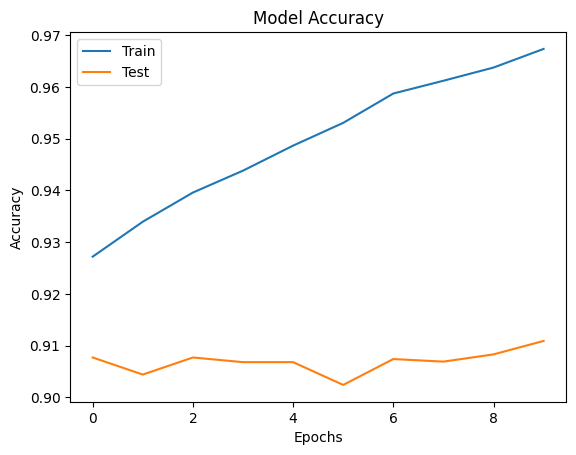

In [20]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train","Test"])
plt.ylabel("Accuracy")
plt.show()

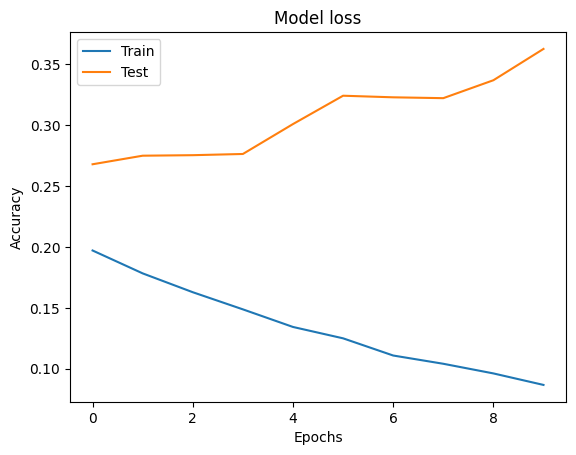

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.legend(["Train","Test"])
plt.ylabel("Accuracy")
plt.show()